<a href="https://colab.research.google.com/github/BarbaraCarmo/lista02PAI/blob/main/listaPAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 01
Comparação entre algoritmos de segmentação.

Limiar calculado por Otsu: 180.0


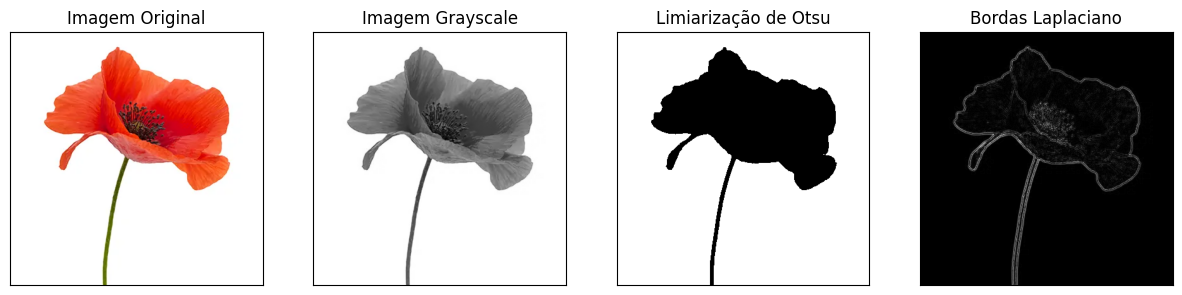

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carregar a imagem (substitua 'caminho/para/sua/imagem.jpg' pelo caminho real da sua imagem)

img_color = cv2.imread('/content/flor_em_fundo_branco.jpeg', cv2.IMREAD_COLOR)
img = cv2.imread('/content/flor_em_fundo_branco.jpeg', cv2.IMREAD_GRAYSCALE)


if img is None or img_color is None:
    print("Erro ao carregar a imagem. Verifique o caminho.")
else:
    # --- Limiarização de Otsu ---

    # A Limiarização de Otsu é um método para encontrar automaticamente um valor de limiar global
    # a partir do histograma de uma imagem em tons de cinza. Ele assume que a imagem contém
    # dois picos de histograma (fundo e objeto) e calcula um limiar que minimiza a variância
    # intra-classe das duas classes.

    # O segundo argumento é o valor de limiar inicial (pode ser 0 para Otsu).
    # O terceiro argumento é o valor máximo a ser atribuído aos pixels que excedem o limiar.
    # O quarto argumento é o tipo de limiarização a ser aplicado, combinado com cv2.THRESH_OTSU.
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print(f"Limiar calculado por Otsu: {ret}")

    # --- Segmentação por Bordas Laplaciano ---

    # O operador Laplaciano é um operador de segunda ordem que calcula a segunda derivada espacial
    # de uma imagem. Ele detecta bordas encontrando regiões de rápida variação na intensidade
    # dos pixels. É sensível ao ruído, por isso é comum aplicar um desfoque antes.

    # Aplicar um desfoque Gaussiano para reduzir o ruído
    img_blur = cv2.GaussianBlur(img, (3, 3), 0)

    # Aplicar o operador Laplaciano
    # O primeiro argumento é a imagem de entrada (preferencialmente desfocada).
    # O segundo argumento é a profundidade desejada da matriz de saída (cv2.CV_64F para evitar saturação).
    laplacian = cv2.Laplacian(img_blur, cv2.CV_64F)

    # Converter a saída para uint8 para exibição
    # Os valores Laplacianos podem ser negativos, então pegamos o valor absoluto e convertemos.
    laplacian_8u = np.uint8(np.absolute(laplacian))


    # --- Exibição dos resultados ---
    plt.figure(figsize=(15, 6)) # Increased figure size to accommodate the fourth image

    plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)) # Display original color image
    plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 4, 2), plt.imshow(img, cmap='gray')
    plt.title('Imagem Grayscale'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 4, 3), plt.imshow(thresh, cmap='gray')
    plt.title('Limiarização de Otsu'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 4, 4), plt.imshow(laplacian_8u, cmap='gray')
    plt.title('Bordas Laplaciano'), plt.xticks([]), plt.yticks([])

    plt.show()

# Questão 02
Representação e descrição geométrica de regiões.


Centroid of the largest contour: (194, 217)
Calculated Convex Hull with 4 points.
Calculated Shape Signature with 2898 points.


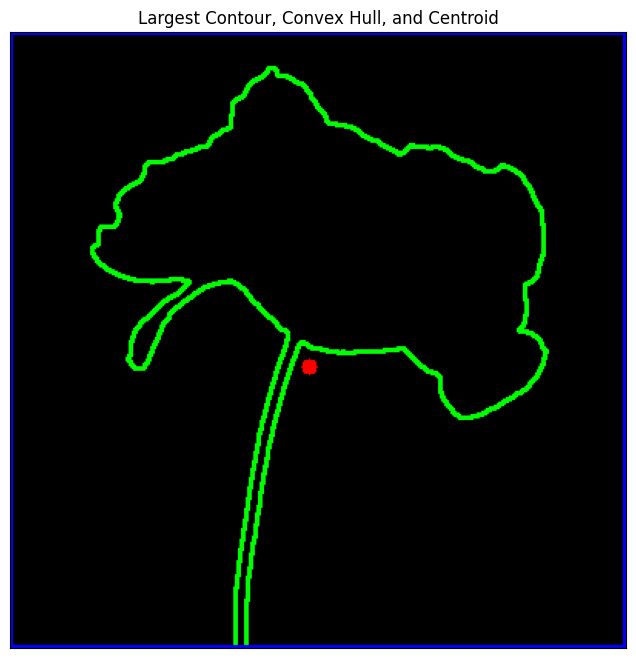

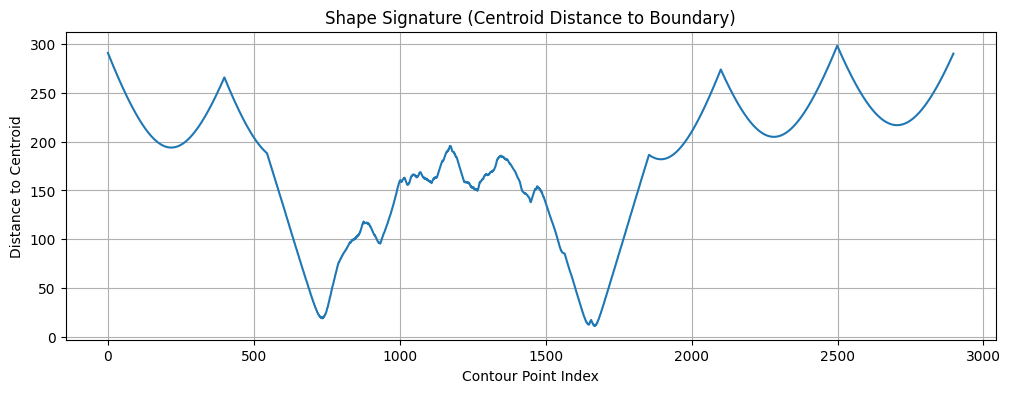

In [22]:
# 1. Encontrar os contornos na imagem segmentada binária (do método de Otsu).
# A variável `thresh` da célula anterior contém a imagem segmentada por Otsu.
# cv2.findContours pode modificar a imagem de entrada, então trabalhamos em uma cópia.
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Verificar se algum contorno foi encontrado
if not contours:
    print("Nenhum contorno encontrado.")
else:
    # 2. Selecionar o maior contorno encontrado, assumindo que corresponde ao objeto principal (a flor).
    largest_contour = max(contours, key=cv2.contourArea)

    # 3. Calcular o Fecho Convexo do contorno selecionado usando cv2.convexHull.
    convex_hull = cv2.convexHull(largest_contour)

    # 4. Calcular os momentos do contorno selecionado usando cv2.moments.
    moments = cv2.moments(largest_contour)

    # 5. Calcular o centroide do contorno a partir dos momentos.
    # Evitar divisão por zero se a área (m00) for zero.
    if moments["m00"] != 0:
        cX = int(moments["m10"] / moments["m00"])
        cY = int(moments["m01"] / moments["m00"])
        centroid = (cX, cY)
        print(f"Centroide do maior contorno: {centroid}")

        # 6. Para cada ponto no contorno selecionado, calcular a distância Euclidiana do ponto ao centroide.
        # Esta será a Assinatura de Forma.
        shape_signature = [np.linalg.norm(np.array(point[0]) - np.array(centroid)) for point in largest_contour]

        print(f"Fecho Convexo calculado com {len(convex_hull)} pontos.")
        print(f"Assinatura de Forma calculada com {len(shape_signature)} pontos.")

        # Opcional: Visualizar os resultados
        # Criar uma imagem em branco para desenhar contornos, fecho convexo e centroide
        img_contours = np.zeros_like(img_color)
        cv2.drawContours(img_contours, [largest_contour], -1, (0, 255, 0), 2) # Desenhar o maior contorno em verde
        cv2.drawContours(img_contours, [convex_hull], -1, (255, 0, 0), 2) # Desenhar o fecho convexo em azul
        cv2.circle(img_contours, centroid, 5, (0, 0, 255), -1) # Desenhar o centroide em vermelho

        plt.figure(figsize=(10, 8))
        plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
        plt.title('Maior Contorno, Fecho Convexo e Centroide')
        plt.xticks([]), plt.yticks([])
        plt.show()

        # Opcional: Plotar a Assinatura de Forma
        plt.figure(figsize=(12, 4))
        plt.plot(shape_signature)
        plt.title('Assinatura de Forma (Distância do Centroide à Fronteira)')
        plt.xlabel('Índice do Ponto do Contorno')
        plt.ylabel('Distância ao Centroide')
        plt.grid(True)
        plt.show()

    else:
        print("Não foi possível calcular o centroide: A área do maior contorno é zero.")